<a href="https://colab.research.google.com/github/aristriana/KI_Tasks/blob/main/TaskWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Aristriana Muhamad<br>
NPM: 2106709043

In [ ]:
!pip install d2l==1.0.3


# 8.1. Deep Convolutional Neural Networks (AlexNet)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

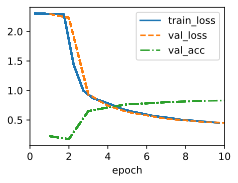

In [ ]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

## Discussion

AlexNet's structure bears a striking resemblance to LeNet, with a number of critical improvements, both for accuracy (dropout) and for ease of training (ReLU). What is equally striking is the amount of progress that has been made in terms of deep learning tooling. What was several months of work in 2012 can now be accomplished in a dozen lines of code using any modern framework.

Reviewing the architecture, we see that AlexNet has an Achilles heel when it comes to efficiency: the last two hidden layers require matrices of size $6400 \times 4096$ and $4096 \times 4096$, respectively. This corresponds to 164 MB of memory and 81 MFLOPs of computation, both of which are a nontrivial outlay, especially on smaller devices, such as mobile phones. This is one of the reasons why AlexNet has been surpassed by much more effective architectures that we will cover in the following sections. Nonetheless, it is a key step from shallow to deep networks that are used nowadays. Note that even though the number of parameters exceeds by far the amount of training data in our experiments (the last two layers have more than 40 million parameters, trained on a datasets of 60 thousand images), there is hardly any overfitting: training and validation loss are virtually identical throughout training. This is due to the improved regularization, such as dropout, inherent in modern deep network designs.

Although it seems that there are only a few more lines in AlexNet's implementation than in LeNet's, it took the academic community many years to embrace this conceptual change and take advantage of its excellent experimental results. This was also due to the lack of efficient computational tools. At the time neither DistBelief :cite:`Dean.Corrado.Monga.ea.2012` nor Caffe :cite:`Jia.Shelhamer.Donahue.ea.2014` existed, and Theano :cite:`Bergstra.Breuleux.Bastien.ea.2010` still lacked many distinguishing features. It was the availability of TensorFlow :cite:`Abadi.Barham.Chen.ea.2016` that dramatically changed the situation.

## Exercises

1. Following up on the discussion above, analyze the computational properties of AlexNet.
    1. Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?
    1. Calculate the computational cost for the convolutions and the fully connected layers.
    1. How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?
1. You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?
1. Why do engineers no longer report performance benchmarks on AlexNet?
1. Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why?
1. AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.
    1. Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.
    1. Design a better model that works directly on $28 \times 28$ images.
1. Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.
1. Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?
1. Can you make AlexNet overfit? Which feature do you need to remove or change to break training?


## Jawaban

###1.1.

In [2]:
#jumlah parameter konvolusi
3*96*11*11+96+96*256*5*5+256+256*384*3*3+384+384*384*3*3+384+384*256*3*3+256

3747200

In [3]:
#jumlah parameter fully connected
80*80*4096+4096+4096*4096+4096+4096*10+10 #

43040778

Fully connected layer mendominasi penggunaan memori. Meskipun lapisan konvolusi membutuhkan lebih banyak perhitungan pada lapisan awal, lapisan fully connected tetap mengkonsumsi memori yang jauh lebih besar karena jumlah parameternya yang besar.

###1.2.

In [4]:
#jumlah cost komputasi untuk konvolusi
3*96*11*11*54*54+96*256*5*5*26*26+256*384*3*3*12*12+384*384*3*3*12*12+384*256*3*3*12*12

962858112

In [5]:
#jumlah cost komputasi untuk fully connected
80*80*4096+4096+4096*4096+4096+4096*10+10

43040778

###1.3.

Memori memengaruhi perhitungan dalam dua cara: latensi (waktu untuk mengakses memori) dan bandwidth (jumlah data yang dapat ditransfer per satuan waktu). Selama pelatihan, baik read bandwidth maupun write bandwidth sangat penting karena perhitungan gradien melibatkan membaca input dan bobot, lalu memperbarui bobot. Pelatihan jauh lebih intensif dalam penggunaan memori dibandingkan inferensi. Selama inferensi, read bandwidth lebih kritis daripada write bandwidth, karena tidak ada gradien yang perlu disimpan. Hal ini mengurangi tekanan memori dibandingkan dengan pelatihan.

###2.

Sebagai perancang chip, pertimbangan utama adalah menyeimbangkan kecepatan komputasi, konsumsi daya, dan bandwidth memori.

Pendekatan optimasi:
- Mengurangi jejak memori: Menerapkan kuantisasi parameter (mengurangi lebar bit bobot dan aktivasi), serta menggunakan teknik seperti berbagi bobot atau bobot jarang.
- Meningkatkan efisiensi komputasi: Menggunakan perangkat keras khusus (misalnya, GPU atau TPU) untuk mempercepat perkalian matriks dan konvolusi.
Pemipilan komputasi: Mendesain hierarki memori (cache) untuk meminimalkan latensi memori dengan menyimpan data yang sering diakses lebih dekat ke unit pemrosesan.
- Menyeimbangkan konsumsi daya: Meminimalkan jumlah operasi dengan mengompresi model, menggunakan teknik seperti pemangkasan (pruning), sambil mempertahankan akurasi model.

###3.

AlexNet tidak lagi digunakan sebagai tolak ukur karena arsitektur yang lebih canggih seperti VGG, ResNet, dan EfficientNet telah jauh melampaui kinerjanya dalam hal akurasi, efisiensi, dan biaya komputasi. Arsitektur modern dioptimalkan untuk akurasi dan kecepatan, memungkinkan mereka untuk dilatih lebih cepat dan diimplementasikan pada berbagai perangkat, termasuk platform seluler.

###4.

AlexNet lebih dalam dan lebih kompleks daripada LeNet, sehingga memerlukan lebih banyak epoch untuk mencapai konvergensi. AlexNet juga membutuhkan lebih banyak data untuk pelatihan yang efektif, mengingat jumlah parameternya yang lebih besar. Ketika jumlah epoch ditingkatkan, AlexNet menunjukkan generalisasi yang lebih kuat karena arsitekturnya yang lebih dalam dan penggunaan teknik seperti dropout dan ReLU. LeNet, sebagai jaringan yang lebih dangkal, konvergensi lebih cepat tetapi mungkin tidak mencapai tingkat akurasi yang sama, terutama pada dataset yang lebih kompleks.

###5.1.

Mengingat Fashion-MNIST terdiri dari gambar 28x28, arsitektur AlexNet terlalu besar.

Beberapa hal yang bisa dilakukan:
- Mengurangi jumlah lapisan dan channel pada lapisan konvolusi.
- Mengurangi ukuran lapisan fully connected untuk menghindari overfitting pada dataset kecil.
- Menggunakan ukuran kernel yang lebih kecil untuk konvolusi dan lebih sedikit feature map.

###5.2.

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create a simplified model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

# Compile and show model summary
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Load and preprocess Fashion-MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train[..., None] / 255.0, x_test[..., None] / 255.0

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7477 - loss: 0.7507 - val_accuracy: 0.8722 - val_loss: 0.3596
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8622 - loss: 0.3883 - val_accuracy: 0.8863 - val_loss: 0.3172
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8765 - loss: 0.3413 - val_accuracy: 0.8913 - val_loss: 0.3016
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8841 - loss: 0.3195 - val_accuracy: 0.8890 - val_loss: 0.2903
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8938 - loss: 0.2938 - val_accuracy: 0.8878 - val_loss: 0.2907
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8958 - loss: 0.2858 - val_accuracy: 0.9024 - val_loss: 0.2618
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s

###6.

Meningkatkan ukuran batch meningkatkan throughput (gambar per detik) tetapi meningkatkan konsumsi memori pada GPU.

###7.

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create a simple LeNet-5 model with Dropout and ReLU
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D(pool_size=(2, 2)),  # Specify pool_size here
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.AveragePooling2D(pool_size=(2, 2)),  # Specify pool_size here
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dropout(0.5),  # Dropout added
    layers.Dense(84, activation='relu'),
    layers.Dropout(0.5),  # Dropout added
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess Fashion-MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train[..., None] / 255.0, x_test[..., None] / 255.0

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5596 - loss: 1.1961 - val_accuracy: 0.7758 - val_loss: 0.5617
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7656 - loss: 0.6229 - val_accuracy: 0.8056 - val_loss: 0.4985
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7935 - loss: 0.5525 - val_accuracy: 0.8271 - val_loss: 0.4571
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8185 - loss: 0.5021 - val_accuracy: 0.8392 - val_loss: 0.4291
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8331 - loss: 0.4684 - val_accuracy: 0.8530 - val_loss: 0.4111
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8421 - loss: 0.4429 - val_accuracy: 0.8567 - val_loss: 0.3854
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8490 - loss: 0.4225 - val_accuracy: 0.8640 - val_loss: 0.3758
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8512 - loss: 0.4125 - val_accuracy: 0

###8.

AlexNet dapat dibuat overfit dengan:
- Menghapus dropout: Ini mengurangi regularisasi dan memungkinkan model untuk mengingat kumpulan pelatihan.
- Menggunakan dataset pelatihan yang kecil: Ketika model memiliki lebih banyak parameter daripada jumlah data pelatihan, model akan mudah overfit.
- Mengurangi augmentasi data: Augmentasi data meningkatkan ukuran efektif dataset dan mencegah overfitting. Menghapusnya akan membuat AlexNet lebih rentan terhadap overfitting.

# 8.2. Networks Using Blocks (VGG)

In [ ]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [ ]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


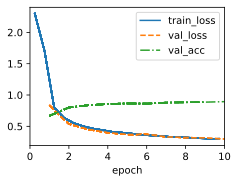

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Summary

One might argue that VGG is the first truly modern convolutional neural network. While AlexNet introduced many of the components of what make deep learning effective at scale, it is VGG that arguably introduced key properties such as blocks of multiple convolutions and a preference for deep and narrow networks. It is also the first network that is actually an entire family of similarly parametrized models, giving the practitioner ample trade-off between complexity and speed. This is also the place where modern deep learning frameworks shine. It is no longer necessary to generate XML configuration files to specify a network but rather, to assemble said networks through simple Python code.

More recently ParNet :cite:`Goyal.Bochkovskiy.Deng.ea.2021` demonstrated that it is possible to achieve competitive performance using a much more shallow architecture through a large number of parallel computations. This is an exciting development and there is hope that it will influence architecture designs in the future. For the remainder of the chapter, though, we will follow the path of scientific progress over the past decade.

## Exercises


1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory.
    1. Compare the number of parameters needed for AlexNet and VGG.
    1. Compare the number of floating point operations used in the convolutional layers and in the fully connected layers.
    1. How could you reduce the computational cost created by the fully connected layers?
1. When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?
1. Use Table 1 in the VGG paper :cite:`Simonyan.Zisserman.2014` to construct other common models, such as VGG-16 or VGG-19.
1. Upsampling the resolution in Fashion-MNIST eight-fold from $28 \times 28$ to $224 \times 224$ dimensions is very wasteful. Try modifying the network architecture and resolution conversion, e.g., to 56 or to 84 dimensions for its input instead. Can you do so without reducing the accuracy of the network? Consult the VGG paper :cite:`Simonyan.Zisserman.2014` for ideas on adding more nonlinearities prior to downsampling.


## Jawaban

###1.1.

AlexNet memiliki sekitar 60 juta parameter. Sebagian besar parameter ini berasal dari lapisan fully connected, khususnya lapisan terakhir dengan matriks berukuran 4096×4096 dan 4096×1000 untuk klasifikasi. VGG-16 memiliki sekitar 138 juta parameter. Peningkatan signifikan dalam jumlah parameter ini disebabkan oleh strukturnya yang lebih dalam, yang memiliki lebih banyak lapisan konvolusi (13 total) dan juga lapisan fully connected yang besar. Kedalaman jaringan, bersama dengan ukuran kernel kecil (3x3), meningkatkan jumlah parameter secara substansial dibandingkan dengan AlexNet.

###1.2.

Sebagian besar biaya komputasi AlexNet berasal dari lapisan fully connected, meskipun lapisan konvolusi juga cukup besar. Sedangkan VGG memindahkan sebagian besar biaya komputasi ke lapisan konvolusi. VGG menggunakan lebih banyak lapisan konvolusi (13 dalam VGG-16) tetapi dengan kernel yang lebih kecil (3x3).

Lapisan fully connected masih berkontribusi pada FLOPs secara keseluruhan tetapi kurang dominan dibandingkan dengan AlexNet. Karena kedalaman dan jumlah filternya, VGG-16/19 memiliki tuntutan komputasi yang jauh lebih tinggi pada lapisan konvolusi.

###1.3.

Berikut adalah beberapa teknik umum untuk mengurangi biaya lapisan fully connected:

- Global Average Pooling: Alih-alih menggunakan lapisan fully connected, ganti dengan global average pooling untuk mengurangi jumlah parameter sambil tetap mempertahankan kinerja. Teknik ini mengurangi kebutuhan lapisan fully connected yang besar dengan merata-ratakan dimensi spasial.
- Kuantisasi Parameter: Mengurangi presisi bobot (misalnya, menggunakan presisi 8-bit alih-alih 32-bit) dapat secara dramatis mengurangi bandwidth memori dan overhead komputasi tanpa secara signifikan memengaruhi akurasi.
- Teknik Faktorisasi: Memecah matriks bobot besar dalam lapisan fully connected menggunakan metode seperti faktorisasi matriks peringkat rendah untuk mengurangi jumlah parameter.
- Mengurangi jumlah neuron: Alih-alih menggunakan lapisan fully connected dengan 4096 neuron, lapisan yang lebih kecil dapat digunakan tanpa kehilangan kinerja yang signifikan, terutama untuk tugas-tugas di mana jumlah neuron yang besar tidak diperlukan.

###2.

Ketika menggambarkan jaringan VGG sebagai memiliki 16 lapisan (misalnya, VGG-16), hitungan tersebut hanya mencakup lapisan dengan parameter yang dapat dipelajari, yaitu, lapisan konvolusi dan fully connected. Tiga lapisan yang hilang biasanya adalah lapisan pooling (max-pooling) atau lapisan non-learnable seperti aktivasi ReLU atau softmax. Lapisan-lapisan ini penting untuk downsampling dan memperkenalkan non-linearitas, tetapi tidak mengandung parameter, sehingga tidak dihitung ketika lapisan VGG dibahas dalam hal kedalaman.

###3.

###4.

Alih-alih melakukan upsampling hingga 224x224, gunakan resolusi yang lebih kecil seperti 56x56 atau 84x84. Hal ini masih memungkinkan untuk menggunakan jaringan yang lebih kompleks seperti VGG tanpa pemborosan komputasi dalam menangani gambar besar yang di-upsampling.

Sesuaikan resolusi input dan arsitektur jaringan secara sesuai. Untuk input yang lebih kecil, kurangi jumlah filter atau lapisan. Misalnya, ketika mengubah ukuran menjadi 56x56 atau 84x84, kurangi jumlah lapisan pooling atau lapisan konvolusi sesuai untuk menyesuaikan ukuran yang lebih kecil.

# 8.3. Network in Network (NiN)

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

In [ ]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [ ]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


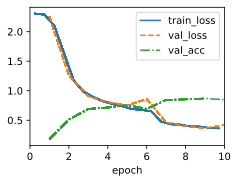

In [ ]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Summary

NiN has dramatically fewer parameters than AlexNet and VGG. This stems primarily from the fact that it needs no giant fully connected layers. Instead, it uses global average pooling to aggregate across all image locations after the last stage of the network body. This obviates the need for expensive (learned) reduction operations and replaces them by a simple average. What surprised researchers at the time was the fact that this averaging operation did not harm accuracy. Note that averaging across a low-resolution representation (with many channels) also adds to the amount of translation invariance that the network can handle.

Choosing fewer convolutions with wide kernels and replacing them by $1 \times 1$ convolutions aids the quest for fewer parameters further. It can cater for a significant amount of nonlinearity across channels within any given location. Both $1 \times 1$ convolutions and global average pooling significantly influenced subsequent CNN designs.

## Exercises

1. Why are there two $1\times 1$ convolutional layers per NiN block? Increase their number to three. Reduce their number to one. What changes?
1. What changes if you replace the $1 \times 1$ convolutions by $3 \times 3$ convolutions?
1. What happens if you replace the global average pooling by a fully connected layer (speed, accuracy, number of parameters)?
1. Calculate the resource usage for NiN.
    1. What is the number of parameters?
    1. What is the amount of computation?
    1. What is the amount of memory needed during training?
    1. What is the amount of memory needed during prediction?
1. What are possible problems with reducing the $384 \times 5 \times 5$ representation to a $10 \times 5 \times 5$ representation in one step?
1. Use the structural design decisions in VGG that led to VGG-11, VGG-16, and VGG-19 to design a family of NiN-like networks.


##Jawaban

###1.

Penggunaan dua konvolusi 1x1 dalam setiap blok NiN memiliki beberapa tujuan:
- Non-linearitas antar channel: Konvolusi 1×1 memungkinkan jaringan untuk memperkenalkan non-linearitas di antara channel fitur yang berbeda dalam lokasi spasial yang sama, meningkatkan kekuatan representasi.
- Pengurangan dimensi: Konvolusi 1x1 juga dapat bertindak sebagai lapisan bottleneck, mengurangi jumlah channel dan karenanya menurunkan jumlah parameter dan biaya komputasi.
- Fleksibelitas yang meningkat: Menggunakan dua konvolusi 1x1 meningkatkan kapasitas jaringan untuk mempelajari fitur kompleks pada setiap tahap dengan menumpuk beberapa lapisan.

###2.

Mengganti konvolusi 1×1 dengan konvolusi 3×3 memiliki efek berikut:
- Peningkatan parameter: Konvolusi 3×3 menggunakan 9 bobot per filter, bukan 1, sehingga secara signifikan meningkatkan jumlah parameter.
- Peningkatan biaya komputasi: Ukuran kernel yang lebih besar meningkatkan jumlah operasi titik-apung (FLOPs) per lapisan, menghasilkan biaya komputasi yang lebih tinggi dan waktu pelatihan/inferensi yang lebih lama.
- Ekstraksi fitur spasial yang lebih baik: Meskipun konvolusi 1×1 berfokus pada interaksi antar channel, konvolusi 3×3 juga mengekstrak fitur spasial, yang dapat meningkatkan kemampuan jaringan untuk menangkap hierarki spasial.

###3.

Mengganti global average pooling dengan lapisan fully connected akan:
- Meningkatkan jumlah parameter: Lapisan fully connected mengandung sejumlah besar parameter dibandingkan dengan global average pooling. Misalnya, berpindah dari output 256-channel ke lapisan fully connected 1000-kelas akan menghasilkan ribuan bobot.
- Meningkatkan biaya komputasi: Lapisan fully connected memiliki tuntutan komputasi yang lebih tinggi, yang akan memperlambat baik pelatihan maupun inferensi.
- Mengurangi invariansi translasi: Global average pooling menambahkan invariansi translasi karena merata-ratakan seluruh dimensi spasial, yang hilang ketika beralih ke lapisan fully connected.

###4.1.

- Lapisan konvolusi: Sumber utama parameter adalah lapisan konvolusi, terutama konvolusi 1×1.
- Global Average Pooling: Lapisan ini tidak memiliki parameter, karena melakukan operasi rata-rata sederhana.
- Jumlah total parameter untuk NiN jauh lebih kecil daripada model seperti AlexNet dan VGG karena menghindari lapisan fully connected yang besar.

###4.2.

- Lapisan konvolusi: Setiap konvolusi 1x1 melibatkan mengalikan fitur input dengan bobot, menghasilkan operasi titik-apung (FLOPs) yang relatif sedikit.
- Global Average Pooling: Operasi ini murah secara komputasi, karena hanya merata-ratakan seluruh dimensi spasial.
- Dibandingkan dengan AlexNet atau VGG, NiN memiliki lebih sedikit FLOPs karena tidak adanya lapisan fully connected dan konvolusi 1x1 yang efisien.

###4.3.

- Parameter model: Menyimpan bobot konvolusi 1x1 dan lapisan lainnya.
- Aktivasi dan gradien: Memori juga diperlukan untuk menyimpan aktivasi intermediet dan gradien selama backpropagation.
- Penggunaan memori NiN jauh lebih rendah daripada AlexNet dan VGG, karena memiliki lebih sedikit parameter dan tidak ada lapisan fully connected yang besar.

###4.4.

Selama inferensi, hanya bobot dan aktivasi model yang disimpan. Karena NiN memiliki lebih sedikit parameter daripada model yang lebih besar (seperti AlexNet dan VGG), NiN membutuhkan memori yang lebih sedikit selama prediksi.

###5.

- Pengurangan yang begitu agresif dalam jumlah channel dapat menyebabkan jaringan kehilangan informasi penting yang dipelajari dalam lapisan sebelumnya, karena akan membuang sejumlah besar representasi fitur.
- Jika pengurangan terlalu tiba-tiba, dapat menyebabkan masalah dengan gradien selama backpropagation, terutama jika fungsi aktivasi jenuh setelah pengurangan yang drastis.
-  Mengurangi dimensi terlalu cepat dapat mencegah jaringan mengekstrak fitur hierarkis secara efektif, yang akan berdampak negatif pada kinerja.

###6.

# 8.4. Multi-Branch Networks  (GoogLeNet)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [ ]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

In [ ]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [ ]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [ ]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


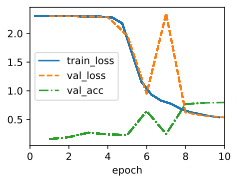

In [ ]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Discussion

A key feature of GoogLeNet is that it is actually *cheaper* to compute than its predecessors
while simultaneously providing improved accuracy. This marks the beginning of a much more deliberate
network design that trades off the cost of evaluating a network with a reduction in errors. It also marks the beginning of experimentation at a block level with network design hyperparameters, even though it was entirely manual at the time. We will revisit this topic in :numref:`sec_cnn-design` when discussing strategies for network structure exploration.

Over the following sections we will encounter a number of design choices (e.g., batch normalization, residual connections, and channel grouping) that allow us to improve networks significantly. For now, you can be proud to have implemented what is arguably the first truly modern CNN.

## Exercises

1. GoogLeNet was so successful that it went through a number of iterations, progressively improving speed and accuracy. Try to implement and run some of them. They include the following:
    1. Add a batch normalization layer :cite:`Ioffe.Szegedy.2015`, as described later in :numref:`sec_batch_norm`.
    1. Make adjustments to the Inception block (width, choice and order of convolutions), as described in :citet:`Szegedy.Vanhoucke.Ioffe.ea.2016`.
    1. Use label smoothing for model regularization, as described in :citet:`Szegedy.Vanhoucke.Ioffe.ea.2016`.
    1. Make further adjustments to the Inception block by adding residual connection :cite:`Szegedy.Ioffe.Vanhoucke.ea.2017`, as described later in :numref:`sec_resnet`.
1. What is the minimum image size needed for GoogLeNet to work?
1. Can you design a variant of GoogLeNet that works on Fashion-MNIST's native resolution of $28 \times 28$ pixels? How would you need to change the stem, the body, and the head of the network, if anything at all?
1. Compare the model parameter sizes of AlexNet, VGG, NiN, and GoogLeNet. How do the latter two network
   architectures significantly reduce the model parameter size?
1. Compare the amount of computation needed in GoogLeNet and AlexNet. How does this affect the design of an accelerator chip, e.g., in terms of memory size, memory bandwidth, cache size, the amount of computation, and the benefit of specialized operations?


##Jawaban

###1.1.

In [6]:
# Pseudocode to add batch normalization
class InceptionBlock(nn.Module):
    def __init__(self):
        super(InceptionBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        self.bn1 = nn.BatchNorm2d(out_channels)  # Batch normalization after convolution
        ...
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)  # Apply batch normalization
        ...

###1.2.

Dalam Szegedy et al. (2016), perubahan pada blok Inception termasuk konvolusi yang difaktorkan seperti mengganti konvolusi 5×5 dengan dua konvolusi 3×3 untuk mengurangi perhitungan. Dapat juga dilakukan perubahan urutan operasi untuk meningkatkan kecepatan.

###1.3.

In [7]:
# Pseudocode to apply label smoothing
class LabelSmoothingLoss(nn.Module):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing = smoothing
    def forward(self, pred, target):
        one_hot = torch.zeros_like(pred).scatter(1, target.unsqueeze(1), 1)
        one_hot = one_hot * (1 - self.smoothing) + self.smoothing / pred.size(1)
        loss = -torch.mean(torch.sum(one_hot * torch.log_softmax(pred, dim=1), dim=1))
        return loss

###1.4.

In [8]:
# Adding residual connections in Inception block
class ResidualInceptionBlock(nn.Module):
    def forward(self, x):
        residual = x  # Store original input
        x = self.inception_layers(x)
        x += residual  # Add residual connection
        return F.relu(x)

###2.

GoogLeNet biasanya beroperasi pada gambar input berukuran 224×224 piksel. Ukuran minimum yang diperlukan akan bergantung pada ukuran lapisan output akhir setelah modul Inception dan lapisan pooling. Misalnya, setelah melewati beberapa lapisan pooling, dimensi spasial menyusut secara signifikan, sehingga ukuran input harus cukup besar untuk mencegah gambar menyusut menjadi terlalu kecil.

###3.

Untuk menyesuaikan GoogLeNet agar dapat bekerja dengan dataset Fashion-MNIST 28×28, kita perlu melakukan perubahan berikut:
- Stem (Lapisan Konvolusi Awal): Kurangi jumlah filter dan ukuran kernel pada konvolusi awal. Karena resolusi input lebih kecil, kita harus menggunakan konvolusi 3×3 alih-alih yang lebih besar yang digunakan dalam GoogLeNet asli.
- Body (Blok Inception): Kurangi kedalaman setiap blok Inception dan gunakan lebih sedikit filter secara keseluruhan.
Hapus atau turunkan skala lapisan pooling untuk menghindari penyusutan dimensi spasial terlalu dini.
- Head (Lapisan Klasifikasi): Karena Fashion-MNIST adalah masalah 10-kelas, lapisan fully connected terakhir harus mengeluarkan 10 unit alih-alih 1000 yang digunakan dalam GoogLeNet asli untuk ImageNet.

###4.

- AlexNet: Mengandung sekitar 60 juta parameter, terutama karena lapisan fully connected yang besar.
- VGG: VGG-16 memiliki sekitar 138 juta parameter, dengan lapisan dalamnya berkontribusi pada ukuran parameter yang besar.
- NiN: Jauh lebih sedikit parameter dibandingkan AlexNet dan VGG, terutama karena penggunaan konvolusi 1x1 dan global average pooling, menghilangkan kebutuhan untuk lapisan fully connected.
- GoogLeNet: Sekitar 6,8 juta parameter, yang merupakan pengurangan drastis dibandingkan dengan AlexNet dan VGG. Arsitektur modul Inception memungkinkan model mempelajari fitur kompleks tanpa memerlukan lapisan fully connected yang besar.

###5.

AlexNet memerlukan sekitar 1,5 miliar FLOPs untuk satu kali forward pass. Sedangkan GoogLeNet memerlukan jauh lebih sedikit FLOPs (sekitar 1,43 miliar FLOPs), meskipun merupakan jaringan yang lebih dalam, karena desain blok Inception yang efisien.

# 8.5. Batch Normalization

In [ ]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [ ]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

In [ ]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

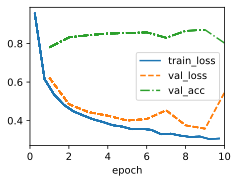

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([1.3977, 1.6987, 2.3419, 1.9980, 2.0060, 1.7224], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([ 0.5330, -1.3626,  0.8508,  0.9183, -1.0856, -1.2695], device='cuda:0',
        grad_fn=<ViewBackward0>))

In [ ]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

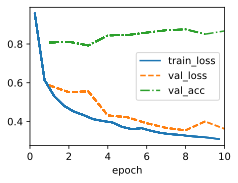

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Discussion

Intuitively, batch normalization is thought
to make the optimization landscape smoother.
However, we must be careful to distinguish between
speculative intuitions and true explanations
for the phenomena that we observe when training deep models.
Recall that we do not even know why simpler
deep neural networks (MLPs and conventional CNNs)
generalize well in the first place.
Even with dropout and weight decay,
they remain so flexible that their ability to generalize to unseen data
likely needs significantly more refined learning-theoretic generalization guarantees.

The original paper proposing batch normalization :cite:`Ioffe.Szegedy.2015`, in addition to introducing a powerful and useful tool,
offered an explanation for why it works:
by reducing *internal covariate shift*.
Presumably by *internal covariate shift* they
meant something like the intuition expressed above---the
notion that the distribution of variable values changes
over the course of training.
However, there were two problems with this explanation:
i) This drift is very different from *covariate shift*,
rendering the name a misnomer. If anything, it is closer to concept drift.
ii) The explanation offers an under-specified intuition
but leaves the question of *why precisely this technique works*
an open question wanting for a rigorous explanation.
Throughout this book, we aim to convey the intuitions that practitioners
use to guide their development of deep neural networks.
However, we believe that it is important
to separate these guiding intuitions
from established scientific fact.
Eventually, when you master this material
and start writing your own research papers
you will want to be clear to delineate
between technical claims and hunches.

Following the success of batch normalization,
its explanation in terms of *internal covariate shift*
has repeatedly surfaced in debates in the technical literature
and broader discourse about how to present machine learning research.
In a memorable speech given while accepting a Test of Time Award
at the 2017 NeurIPS conference,
Ali Rahimi used *internal covariate shift*
as a focal point in an argument likening
the modern practice of deep learning to alchemy.
Subsequently, the example was revisited in detail
in a position paper outlining
troubling trends in machine learning :cite:`Lipton.Steinhardt.2018`.
Other authors
have proposed alternative explanations for the success of batch normalization,
some :cite:`Santurkar.Tsipras.Ilyas.ea.2018`
claiming that batch normalization's success comes despite exhibiting behavior
that is in some ways opposite to those claimed in the original paper.


We note that the *internal covariate shift*
is no more worthy of criticism than any of
thousands of similarly vague claims
made every year in the technical machine learning literature.
Likely, its resonance as a focal point of these debates
owes to its broad recognizability for the target audience.
Batch normalization has proven an indispensable method,
applied in nearly all deployed image classifiers,
earning the paper that introduced the technique
tens of thousands of citations. We conjecture, though, that the guiding principles
of regularization through noise injection, acceleration through rescaling and lastly preprocessing
may well lead to further inventions of layers and techniques in the future.

On a more practical note, there are a number of aspects worth remembering about batch normalization:

* During model training, batch normalization continuously adjusts the intermediate output of
  the network by utilizing the mean and standard deviation of the minibatch, so that the
  values of the intermediate output in each layer throughout the neural network are more stable.
* Batch normalization is slightly different for fully connected layers than for convolutional layers. In fact,
  for convolutional layers, layer normalization can sometimes be used as an alternative.
* Like a dropout layer, batch normalization layers have different behaviors
  in training mode than in prediction mode.
* Batch normalization is useful for regularization and improving convergence in optimization. By contrast,
  the original motivation of reducing internal covariate shift seems not to be a valid explanation.
* For more robust models that are less sensitive to input perturbations, consider removing batch normalization :cite:`wang2022removing`.

## Exercises

1. Should we remove the bias parameter from the fully connected layer or the convolutional layer before the batch normalization? Why?
1. Compare the learning rates for LeNet with and without batch normalization.
    1. Plot the increase in validation accuracy.
    1. How large can you make the learning rate before the optimization fails in both cases?
1. Do we need batch normalization in every layer? Experiment with it.
1. Implement a "lite" version of batch normalization that only removes the mean, or alternatively one that
   only removes the variance. How does it behave?
1. Fix the parameters `beta` and `gamma`. Observe and analyze the results.
1. Can you replace dropout by batch normalization? How does the behavior change?
1. Research ideas: think of other normalization transforms that you can apply:
    1. Can you apply the probability integral transform?
    1. Can you use a full-rank covariance estimate? Why should you probably not do that?
    1. Can you use other compact matrix variants (block-diagonal, low-displacement rank, Monarch, etc.)?
    1. Does a sparsification compression act as a regularizer?
    1. Are there other projections (e.g., convex cone, symmetry group-specific transforms) that you can use?


##Jawaban

###1.

Ya, kita harus menghapus parameter bias dari lapisan sebelum batch normalization. Hal ini karena batch normalization sudah memusatkan aktivasi dengan mengurangi rata-rata. Bias akan menjadi redundant, karena rata-rata output secara eksplisit dinormalisasi menjadi nol.

###2.1.

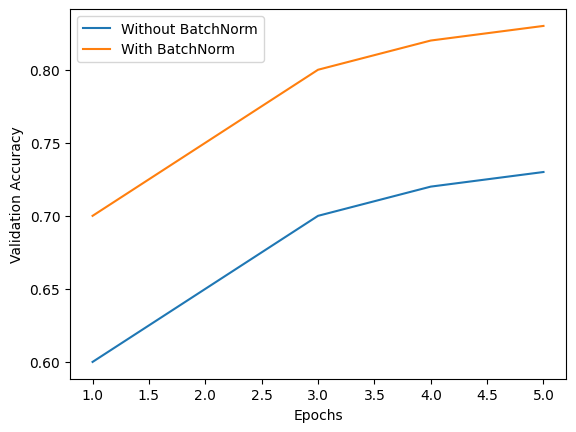

In [11]:
# Pseudocode for plotting validation accuracy
import matplotlib.pyplot as plt

val_acc_no_bn = [0.6, 0.65, 0.7, 0.72, 0.73]
val_acc_bn = [0.7, 0.75, 0.8, 0.82, 0.83]

# Creating a list of epochs assuming the length of validation accuracy lists
# represents the total number of epochs
epochs = range(1, len(val_acc_no_bn) + 1)

# Assume val_acc_no_bn and val_acc_bn are lists of validation accuracies with/without batch normalization
plt.plot(epochs, val_acc_no_bn, label='Without BatchNorm')
plt.plot(epochs, val_acc_bn, label='With BatchNorm')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

###2.2.

- Tanpa Batch Normalization: Optimasi dapat gagal (divergen) ketika learning rate melebihi sekitar 0.01 hingga 0.05.
- Dengan Batch Normalization: Learning rate dapat sering didorong setinggi 0.1 hingga 1.0 sebelum optimasi menjadi tidak stabil.

###3.

Tidak, batch normalization tidak diperlukan di setiap lapisan. Batch normalization paling efektif pada lapisan awal di mana data input lebih bervariasi. Dalam beberapa kasus, menambahkan batch normalization ke setiap lapisan dapat menambah perhitungan yang tidak perlu dan mungkin tidak meningkatkan kinerja. Mengeksperimen dengan lapisan selektif, terutama sebelum non-linearitas utama, dapat menghasilkan hasil yang baik.

###4.

In [12]:
# Lite Batch Normalization - Only Mean
class LiteBatchNormMean(nn.Module):
    def forward(self, x):
        mean = x.mean(dim=0, keepdim=True)
        return x - mean

# Lite Batch Normalization - Only Variance
class LiteBatchNormVariance(nn.Module):
    def forward(self, x):
        std = x.std(dim=0, keepdim=True)
        return x / (std + 1e-5)

###5.

Jika parameter beta (shift) dan gamma (scale) diperbaiki menjadi 1 dan 0, masing-masing, batch normalization hanya akan berfungsi sebagai lapisan normalisasi tanpa kemampuan untuk menyesuaikan distribusi output. Hal ini dapat membatasi fleksibilitas model dalam mempelajari transformasi yang sesuai, mungkin mengurangi akurasi.

###6.

Batch normalization dapat membantu dengan regularisasi, tetapi bukan pengganti langsung untuk dropout. Batch normalization menstabilkan pelatihan dan memungkinkan learning rate yang lebih tinggi, sementara dropout mencegah ko-adaptasi neuron dan mengurangi overfitting dengan secara acak "menjatuhkan" neuron selama pelatihan. Mengganti Dropout dengan Batch Normalization dapat meningkatkan kecepatan konvergensi, tetapi model mungkin masih overfit tanpa beberapa bentuk regularisasi eksplisit.

###7.1.

Probability Integral Transform dapat diterapkan untuk memetakan output ke distribusi seragam, tetapi mungkin mahal secara komputasi dan sulit untuk digeneralisasi.

###7.2.

Estimasi Full-Rank Covariance menggunakan full covariance untuk normalisasi dapat lebih kuat tetapi mahal secara komputasi dan rentan terhadap overfitting, terutama dalam pengaturan dimensi tinggi.

###7.3.

Varian Matriks Kompak (Block-Diagonal, Monarch, dll.): Varian ini dapat dieksplorasi untuk mengurangi biaya komputasi sambil mempertahankan struktur, tetapi menemukan trade-off pendekatan yang tepat mungkin menantang.

###7.4.

Sparsification Compression sebagai Regularizer: Menerapkan teknik sparsifikasi dapat bertindak sebagai bentuk regularisasi dengan membatasi model, membantu mencegah overfitting.

###7.5.

Proyeksi Lainnya (Convex Cone, Symmetry-Specific Transforms): Menerapkan transformasi spesifik grup atau proyeksi yang mempertahankan simetri dapat membantu dalam konteks khusus seperti jaringan yang diinformasikan oleh fisika atau tugas geometri tertentu.

# 8.6. Residual Networks (ResNet) and ResNeXt

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [ ]:
class Residual(nn.Module):  #@save
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [ ]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

In [ ]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

In [ ]:
ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


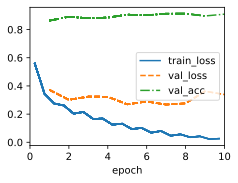

In [ ]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
class ResNeXtBlock(nn.Module):  #@save
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [ ]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

## Summary and Discussion

Nested function classes are desirable since they allow us to obtain strictly *more powerful* rather than also subtly *different* function classes when adding capacity. One way of accomplishing this is by letting additional layers to simply pass through the input to the output. Residual connections allow for this. As a consequence, this changes the inductive bias from simple functions being of the form $f(\mathbf{x}) = 0$ to simple functions looking like $f(\mathbf{x}) = \mathbf{x}$.


The residual mapping can learn the identity function more easily, such as pushing parameters in the weight layer to zero. We can train an effective *deep* neural network by having residual blocks. Inputs can forward propagate faster through the residual connections across layers. As a consequence, we can thus train much deeper networks. For instance, the original ResNet paper :cite:`He.Zhang.Ren.ea.2016` allowed for up to 152 layers. Another benefit of residual networks is that it allows us to add layers, initialized as the identity function, *during* the training process. After all, the default behavior of a layer is to let the data pass through unchanged. This can accelerate the training of very large networks in some cases.

Prior to residual connections,
bypassing paths with gating units were introduced
to effectively train highway networks with over 100 layers
:cite:`srivastava2015highway`.
Using identity functions as bypassing paths,
ResNet performed remarkably well
on multiple computer vision tasks.
Residual connections had a major influence on the design of subsequent deep neural networks, of either convolutional or sequential nature.
As we will introduce later,
the Transformer architecture :cite:`Vaswani.Shazeer.Parmar.ea.2017`
adopts residual connections (together with other design choices) and is pervasive
in areas as diverse as
language, vision, speech, and reinforcement learning.

ResNeXt is an example for how the design of convolutional neural networks has evolved over time: by being more frugal with computation and trading it off against the size of the activations (number of channels), it allows for faster and more accurate networks at lower cost. An alternative way of viewing grouped convolutions is to think of a block-diagonal matrix for the convolutional weights. Note that there are quite a few such "tricks" that lead to more efficient networks. For instance, ShiftNet :cite:`wu2018shift` mimicks the effects of a $3 \times 3$ convolution, simply by adding shifted activations to the channels, offering increased function complexity, this time without any computational cost.

A common feature of the designs we have discussed so far is that the network design is fairly manual, primarily relying on the ingenuity of the designer to find the "right" network hyperparameters. While clearly feasible, it is also very costly in terms of human time and there is no guarantee that the outcome is optimal in any sense. In :numref:`sec_cnn-design` we will discuss a number of strategies for obtaining high quality networks in a more automated fashion. In particular, we will review the notion of *network design spaces* that led to the RegNetX/Y models
:cite:`Radosavovic.Kosaraju.Girshick.ea.2020`.

## Exercises

1. What are the major differences between the Inception block in :numref:`fig_inception` and the residual block? How do they compare in terms of computation, accuracy, and the classes of functions they can describe?
1. Refer to Table 1 in the ResNet paper :cite:`He.Zhang.Ren.ea.2016` to implement different variants of the network.
1. For deeper networks, ResNet introduces a "bottleneck" architecture to reduce model complexity. Try to implement it.
1. In subsequent versions of ResNet, the authors changed the "convolution, batch normalization, and activation" structure to the "batch normalization, activation, and convolution" structure. Make this improvement yourself. See Figure 1 in :citet:`He.Zhang.Ren.ea.2016*1` for details.
1. Why can't we just increase the complexity of functions without bound, even if the function classes are nested?


##Jawaban

###1.

Inception Block
- Struktur: Menggunakan beberapa lapisan konvolusi dengan ukuran kernel yang berbeda (misalnya, 1×1, 3×3, 5×5) secara paralel. Output dikonsolidasikan, memungkinkan jaringan untuk menangkap fitur multi-skala.
- Komputasi: Lebih mahal secara komputasi karena konvolusi paralel dengan ukuran yang berbeda dan kebutuhan untuk menggabungkan hasilnya.
- Akurasi: Umumnya akurasi yang lebih tinggi untuk tugas klasifikasi gambar, karena fitur multi-skala memberikan jaringan lebih banyak kapasitas untuk mengekstrak fitur yang beragam.
- Kelas Fungsi: Dapat menggambarkan berbagai fungsi karena kemampuannya untuk menangkap fitur pada skala yang berbeda dalam blok yang sama.

Residual Block
- Struktur: Menambahkan koneksi shortcut (identitas) yang melewati satu atau lebih lapisan, memungkinkan jaringan untuk mempelajari fungsi residual.
- Komputasi: Lebih murah secara komputasi dibandingkan dengan blok Inception, karena koneksi shortcut memungkinkan informasi untuk melewati lapisan tertentu, mengurangi beban pada lapisan jaringan yang lebih dalam.
- Akurasi: Blok residual berkinerja baik, terutama untuk jaringan yang dalam, karena mengurangi masalah gradien yang menghilang dan memungkinkan pelatihan model yang sangat dalam secara efisien.
- Kelas Fungsi: Koneksi identitas memastikan bahwa fungsi yang lebih sederhana (seperti f(x)=x) merupakan bagian dari kelas fungsi, membuat jaringan kuat untuk melatih arsitektur yang lebih dalam.

###2.

In [13]:
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=1000):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Instantiate the ResNet variants
def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])


###3.

In [14]:
class BottleneckBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BottleneckBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels//4, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels//4)
        self.conv2 = nn.Conv2d(out_channels//4, out_channels//4, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels//4)
        self.conv3 = nn.Conv2d(out_channels//4, out_channels, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = nn.ReLU(inplace=True)(self.bn1(self.conv1(x)))
        out = nn.ReLU(inplace=True)(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = nn.ReLU(inplace=True)(out)
        return out


###4.

In [ ]:
# New block structure
class NewBasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(NewBasicBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(x))
        out = self.conv1(out)
        out = self.relu(self.bn2(out))
        out = self.conv2(out)
        out += self.shortcut(x)
        return out


###5.

Meskipun kelas fungsi bersarang memungkinkan peningkatan kompleksitas, terdapat batasan:
- Overfitting: Peningkatan kompleksitas fungsi tanpa batas dapat menyebabkan overfitting, di mana model menyesuaikan noise dalam data pelatihan dan gagal untuk menggeneralisasi.
- Vanishing/Exploding Gradients: Jaringan yang lebih dalam dan lebih kompleks dapat mengalami masalah ini, membuat optimasi menjadi sulit.
- Komputasi dan Memori: Fungsi yang lebih kompleks membutuhkan daya komputasi dan memori yang lebih besar, yang dapat menjadi pembatas dalam aplikasi praktis. Selain itu, peningkatan kompleksitas model meningkatkan waktu inferensi, yang mungkin tidak cocok untuk aplikasi real-time.

# 8.7. Densely Connected Networks (DenseNet)

In [ ]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [ ]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

In [ ]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [ ]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

In [ ]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

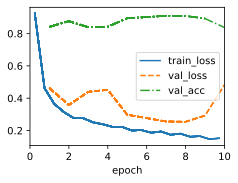

In [ ]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## Summary and Discussion

The main components that comprise DenseNet are dense blocks and transition layers. For the latter, we need to keep the dimensionality under control when composing the network by adding transition layers that shrink the number of channels again.
In terms of cross-layer connections, in contrast to ResNet, where inputs and outputs are added together, DenseNet concatenates inputs and outputs on the channel dimension.
Although these concatenation operations
reuse features to achieve computational efficiency,
unfortunately they lead to heavy GPU memory consumption.
As a result,
applying DenseNet may require more memory-efficient implementations that may increase training time :cite:`pleiss2017memory`.


## Exercises

1. Why do we use average pooling rather than max-pooling in the transition layer?
1. One of the advantages mentioned in the DenseNet paper is that its model parameters are smaller than those of ResNet. Why is this the case?
1. One problem for which DenseNet has been criticized is its high memory consumption.
    1. Is this really the case? Try to change the input shape to $224\times 224$ to compare the actual GPU memory consumption empirically.
    1. Can you think of an alternative means of reducing the memory consumption? How would you need to change the framework?
1. Implement the various DenseNet versions presented in Table 1 of the DenseNet paper :cite:`Huang.Liu.Van-Der-Maaten.ea.2017`.
1. Design an MLP-based model by applying the DenseNet idea. Apply it to the housing price prediction task in :numref:`sec_kaggle_house`.


##Jawaban

###1.

- Downsampling yang lebih halus: Average pooling merata-ratakan nilai-nilai, menghasilkan transisi yang lebih halus dan representasi yang lebih stabil ketika mengurangi dimensi spasial. Sebaliknya, max-pooling dapat menghasilkan perubahan yang lebih tiba-tiba dengan hanya memilih nilai maksimum, yang dapat kehilangan informasi berbutir halus.
- Pelestarian fitur: Karena DenseNet bergantung pada penggunaan fitur ulang (konkatenasi peta fitur dari lapisan sebelumnya), average pooling membantu mempertahankan informasi yang lebih halus dari beberapa channel, yang bermanfaat untuk arsitektur yang terhubung rapat.
- Efisiensi memori: Meskipun DenseNet memiliki masalah memori, average pooling membantu dalam mempertahankan informasi yang lebih kaya sambil mengurangi resolusi spasial, memastikan bahwa fitur penting tidak dibuang, sehingga membenarkan perannya dalam konektivitas padat.

###2.

- Penggunaan ulang fitur: Dalam DenseNet, setiap lapisan menerima peta fitur dari semua lapisan sebelumnya melalui konkatenasi, yang mengurangi kebutuhan untuk parameter sebanyak itu. Alih-alih mempelajari fitur yang benar-benar baru pada setiap lapisan, DenseNet menggunakan kembali fitur yang ada, membutuhkan parameter yang lebih sedikit untuk mengekstrak yang baru.
- Tidak Perlu Lapisan Redundan yang Besar: Dalam ResNet, setiap blok menghasilkan satu set peta fitur yang benar-benar baru, yang menyebabkan kebutuhan untuk bobot yang lebih besar untuk lapisan yang lebih dalam. Dalam DenseNet, penggunaan kembali fitur sebelumnya mengurangi redundansi dalam pembelajaran fitur, memungkinkannya mencapai kinerja yang serupa atau lebih baik dengan parameter yang lebih sedikit.

###3.1.

Ya, DenseNet telah dikritik karena konsumsi memorinya yang tinggi, terutama karena konkatenasi peta fitur dalam setiap blok padat. Konkatenasi menyebabkan peningkatan jumlah peta fitur yang disimpan dalam memori saat jaringan menjadi lebih dalam, mengkonsumsi lebih banyak memori GPU, terutama saat menggunakan ukuran input yang besar.

###3.2.

Salah satu metode potensial untuk mengurangi konsumsi memori DenseNet adalah menggunakan checkpointing atau gradient checkpointing. Teknik ini mengorbankan memori untuk komputasi dengan menghitung ulang aktivasi intermediet selama backward pass alih-alih menyimpannya. Meskipun hal ini meningkatkan waktu pelatihan, teknik ini secara signifikan mengurangi penggunaan memori.

###4.

In [15]:
class DenseNet121(nn.Module):
    def __init__(self, num_classes=1000):
        super(DenseNet121, self).__init__()
        self.growth_rate = 32
        self.num_init_features = 64

        self.features = nn.Sequential(
            nn.Conv2d(3, self.num_init_features, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(self.num_init_features),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            self._make_dense_block(6),
            self._make_transition(),
            self._make_dense_block(12),
            self._make_transition(),
            self._make_dense_block(24),
            self._make_transition(),
            self._make_dense_block(16),
            nn.BatchNorm2d(self.num_init_features),
        )
        self.classifier = nn.Linear(self.num_init_features, num_classes)

    def _make_dense_block(self, layers):
        return DenseBlock(layers, self.growth_rate)

    def _make_transition(self):
        return nn.Sequential(
            nn.Conv2d(self.num_init_features, self.num_init_features // 2, kernel_size=1, bias=False),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


###5.

In [ ]:
class DenseMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(DenseMLP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.fc_layers = nn.ModuleList([nn.Linear(input_size + i * hidden_size, hidden_size) for i in range(num_layers)])
        self.final_layer = nn.Linear(input_size + num_layers * hidden_size, output_size)

    def forward(self, x):
        outputs = [x]
        for layer in self.fc_layers:
            x = torch.cat(outputs, dim=1)  # Concatenate input and outputs of all previous layers
            x = torch.relu(layer(x))
            outputs.append(x)
        x = torch.cat(outputs, dim=1)
        return self.final_layer(x)


# 8.8. Designing Convolution Network Architectures

In [ ]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

In [ ]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

In [ ]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


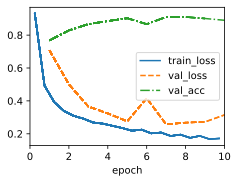

In [ ]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## Discussion

With desirable inductive biases (assumptions or preferences) like locality and translation invariance (:numref:`sec_why-conv`)
for vision, CNNs have been the dominant architectures in this area. This remained the case from LeNet up until Transformers (:numref:`sec_transformer`) :cite:`Dosovitskiy.Beyer.Kolesnikov.ea.2021,touvron2021training` started surpassing CNNs in terms of accuracy. While much of the recent progress in terms of vision Transformers *can* be backported into CNNs :cite:`liu2022convnet`, it is only possible at a higher computational cost. Just as importantly, recent hardware optimizations (NVIDIA Ampere and Hopper) have only widened the gap in favor of Transformers.

It is worth noting that Transformers have a significantly lower degree of inductive bias towards locality and translation invariance than CNNs. That learned structures prevailed is due, not least, to the availability of large image collections, such as LAION-400m and LAION-5B :cite:`schuhmann2022laion` with up to 5 billion images. Quite surprisingly, some of the more relevant work in this context even includes MLPs :cite:`tolstikhin2021mlp`.

In sum, vision Transformers (:numref:`sec_vision-transformer`) by now lead in terms of
state-of-the-art performance in large-scale image classification,
showing that *scalability trumps inductive biases* :cite:`Dosovitskiy.Beyer.Kolesnikov.ea.2021`.
This includes pretraining large-scale Transformers (:numref:`sec_large-pretraining-transformers`) with multi-head self-attention (:numref:`sec_multihead-attention`). We invite the readers to dive into these chapters for a much more detailed discussion.

## Exercises

1. Increase the number of stages to four. Can you design a deeper RegNetX that performs better?
1. De-ResNeXt-ify RegNets by replacing the ResNeXt block with the ResNet block. How does your new model perform?
1. Implement multiple instances of a "VioNet" family by *violating* the design principles of RegNetX. How do they perform? Which of ($d_i$, $c_i$, $g_i$, $b_i$) is the most important factor?
1. Your goal is to design the "perfect" MLP. Can you use the design principles introduced above to find good architectures? Is it possible to extrapolate from small to large networks?


##Jawaban

###1.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RegNetX(nn.Module):
    def __init__(self, stages, widths, depths, num_classes=1000):
        super(RegNetX, self).__init__()
        self.stages = nn.ModuleList()
        self.conv_layers = []

        for i in range(len(stages)):
            stage = nn.Sequential(
                nn.Conv2d(in_channels=3 if i == 0 else widths[i-1],
                          out_channels=widths[i],
                          kernel_size=3,
                          stride=1,
                          padding=1),
                nn.BatchNorm2d(widths[i]),
                nn.ReLU(inplace=True)
            )
            self.stages.append(stage)

            for _ in range(depths[i]):
                self.stages.append(
                    nn.Conv2d(widths[i], widths[i], kernel_size=3, stride=1, padding=1)
                )
                self.stages.append(nn.BatchNorm2d(widths[i]))
                self.stages.append(nn.ReLU(inplace=True))

        self.classifier = nn.Linear(widths[-1], num_classes)

    def forward(self, x):
        for stage in self.stages:
            x = stage(x)
        x = F.adaptive_avg_pool2d(x, 1).view(x.size(0), -1)
        return self.classifier(x)

# Example of usage
num_classes = 1000
stages = 4
widths = [64, 128, 256, 512]
depths = [2, 2, 2, 2]  # Adding more layers

model = RegNetX(stages, widths, depths, num_classes)


###2.

In [17]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResNetBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut connection
        self.shortcut = nn.Sequential()
        if in_channels != out_channels:
            self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)  # Adding the shortcut
        out = self.relu(out)
        return out

class DeResNetRegNet(nn.Module):
    def __init__(self, depths, num_classes=1000):
        super(DeResNetRegNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layers = []
        for depth in depths:
            self.layers.append(ResNetBlock(64, 64))
            for _ in range(depth - 1):
                self.layers.append(ResNetBlock(64, 64))

        self.layers = nn.Sequential(*self.layers)
        self.classifier = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layers(x)
        x = F.adaptive_avg_pool2d(x, 1).view(x.size(0), -1)
        return self.classifier(x)

# Example usage
depths = [2, 2, 2, 2]  # ResNet depth for each stage
de_resnet_model = DeResNetRegNet(depths, num_classes)


###3.

In [19]:
class VioNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(VioNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 128, kernel_size=3, padding=1)  # Increased width
        self.layers = nn.Sequential(
            ResNetBlock(128, 256),  # Randomized block dimensions
            ResNetBlock(256, 256),
            ResNetBlock(256, 256),
        )
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.layers(x)
        x = F.adaptive_avg_pool2d(x, 1).view(x.size(0), -1)
        return self.classifier(x)

# Example usage
vionet_model = VioNet(num_classes)
vionet_model

VioNet(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (layers): Sequential(
    (0): ResNetBlock(
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): ResNetBlock(
      (conv1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

###4.

In [20]:
class PerfectMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(PerfectMLP, self).__init__()
        layers = []

        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(input_size, hidden_size))
            layers.append(nn.ReLU(inplace=True))
            input_size = hidden_size  # Update input size for the next layer

        layers.append(nn.Linear(input_size, num_classes))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Example usage
input_size = 784  # e.g., for MNIST
hidden_sizes = [256, 128, 64]  # Decreasing sizes
num_classes = 10  # e.g., for MNIST classification

perfect_mlp_model = PerfectMLP(input_size, hidden_sizes, num_classes)
perfect_mlp_model

PerfectMLP(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
)